# Functional Gaussian process example

First, import the required libraries

In [2]:
# Standard imports
import os
from pprint import pprint

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Project imports
import twinlab as tl

Now, define some parameters

In [5]:
# File paths
campaign_dir = os.path.join("resources", "campaigns", "ukaea")
datasets_dir = os.path.join("resources", "datasets")
filepath_grid = os.path.join(campaign_dir, "grid.csv")
filepath_train = os.path.join(datasets_dir, "ukaea_small.csv")
# filepath_eval = os.path.join(campaign_dir, "eval.csv")
# filepath_eval = os.path.join(campaign_dir, "post.csv")
filepath_eval = os.path.join(campaign_dir, "test.csv")

# Campaign parameters
campaign_id = "ukaea"
dataset_id = "ukaea"

Load the necessary data for training and plotting

In [6]:
df_train = pd.read_csv(filepath_train)
df_eval = pd.read_csv(filepath_eval)
df_grid = pd.read_csv(filepath_grid, header=None)

Next, we create the parameter dictionary that we need to give to run twinLab.  At a minimum the user must provide the `filename` of the dataset on which we want to train our model (csv format), together with the columns that we will take to be the `inputs` and `outputs` of our model, once that is trained. By default, `twinLab` will train a Gaussian process (`emulator=gaussian_process`) and use all of the data for training. This latter choice can be overridden by adding e.g., `train_test_split=100` so that only the first 100 entries in `filename` are used for training, and the remaining examples can then be used for model evaluation.

In [7]:
# Column headings for outputs
y_outputs = [f"y{i}" for i in range(len(df_grid))]

# Parameters
params = {
    "dataset_id": dataset_id,
    "inputs": ["E1", "E2", "E3", "n1", "n2"],
    "outputs": y_outputs,
    "decompose_outputs": True,
    "test_train_ratio": 0.8,
}
pprint(params, compact=True)

{'dataset_id': 'ukaea',
 'decompose_outputs': True,
 'inputs': ['E1', 'E2', 'E3', 'n1', 'n2'],
 'outputs': ['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10',
             'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19',
             'y20', 'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28',
             'y29', 'y30', 'y31', 'y32', 'y33', 'y34', 'y35', 'y36', 'y37',
             'y38', 'y39', 'y40', 'y41', 'y42', 'y43', 'y44', 'y45', 'y46',
             'y47', 'y48', 'y49', 'y50', 'y51', 'y52', 'y53', 'y54', 'y55',
             'y56', 'y57', 'y58', 'y59', 'y60', 'y61', 'y62', 'y63', 'y64',
             'y65', 'y66', 'y67', 'y68', 'y69', 'y70', 'y71', 'y72', 'y73',
             'y74', 'y75', 'y76', 'y77', 'y78', 'y79', 'y80', 'y81', 'y82',
             'y83', 'y84', 'y85', 'y86', 'y87', 'y88', 'y89', 'y90', 'y91',
             'y92', 'y93', 'y94', 'y95', 'y96', 'y97', 'y98', 'y99', 'y100',
             'y101', 'y102', 'y103', 'y104', 'y105', 'y106', 'y1

Now the dataset can be uploaded to the cloud

In [8]:
tl.upload_dataset(filepath_train, dataset_id, verbose=True)

File resources/datasets/ukaea_small.csv is uploading.
Processing dataset.
Dataset ukaea was processed.


List the datasets to check that the upload worked

In [9]:
_ = tl.list_datasets(verbose=True)

Datasets:
['biscuits', 'ukaea', 'inverse-methods', 'predict', 'wing-inverse', 'biscuits2',
 'basic']


Print some useful properties of the dataset

In [10]:
_ = tl.query_dataset(dataset_id, verbose=True)

Dataset summary:
               E1          E2          E3          n1          n2  \
count  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.847811    1.096564    1.439218    0.002780    0.000550   
std      0.086283    0.113226    0.183739    0.001264    0.000254   
min      0.700338    0.902457    1.103538    0.000522    0.000100   
25%      0.776996    1.004006    1.280775    0.001742    0.000322   
50%      0.846752    1.089826    1.435188    0.002727    0.000586   
75%      0.923479    1.195031    1.588289    0.003888    0.000756   
max      0.997323    1.299867    1.748338    0.004999    0.000995   

                 y0            y1            y2            y3            y4  \
count  4.000000e+02  4.000000e+02  4.000000e+02  4.000000e+02  4.000000e+02   
mean   6.361675e+16  6.873802e+16  7.426884e+16  8.022546e+16  8.661425e+16   
std    6.795742e+16  7.317686e+16  7.878150e+16  8.479061e+16  9.120958e+16   
min    1.963621e+14  2.115386e+14  2.298551e+

Train the model, this step should take less than two minutes.

In [11]:
tl.train_campaign(params, campaign_id, verbose=True)

Model ukaea has begun training.


List the campaigns again to ensure that training has been completed

In [12]:
_ = tl.list_campaigns(verbose=True)

Trained models:
['wing-inverse', 'predict', 'inverse-methods', 'biscuits', 'ukaea']


Query the campaign to check how training has been

In [13]:
_ = tl.query_campaign(campaign_id, verbose=True)

Model summary:
{'model_summary': "{'transformer_diagnostics': [], 'estimator_diagnostics': "
                  "{'base_estimator_diagnostics': {'covar_module': "
                  'ScaleKernel(\n'
                  '  (base_kernel): MaternKernel(\n'
                  '    (lengthscale_prior): GammaPrior()\n'
                  '    (raw_lengthscale_constraint): Positive()\n'
                  '  )\n'
                  '  (outputscale_prior): GammaPrior()\n'
                  '  (raw_outputscale_constraint): Positive()\n'
                  "), 'mean_module': ConstantMean(), "
                  "'likelihood.noise_covar.raw_noise': "
                  'array([[9.99999975e-05],\n'
                  '       [9.99999975e-05],\n'
                  '       [9.99999975e-05],\n'
                  '       [9.99999975e-05],\n'
                  '       [9.99999975e-05],\n'
                  '       [1.10213640e-04]]), '
                  "'likelihood.noise_covar.noise_prior.concentration': "
      

Evaluate the trained emulator on `X` from the evaluation file

In [14]:
df_mean, df_std = tl.predict_campaign(filepath_eval, campaign_id, verbose=False)

Plot the results for a few different `y` values to sanity check

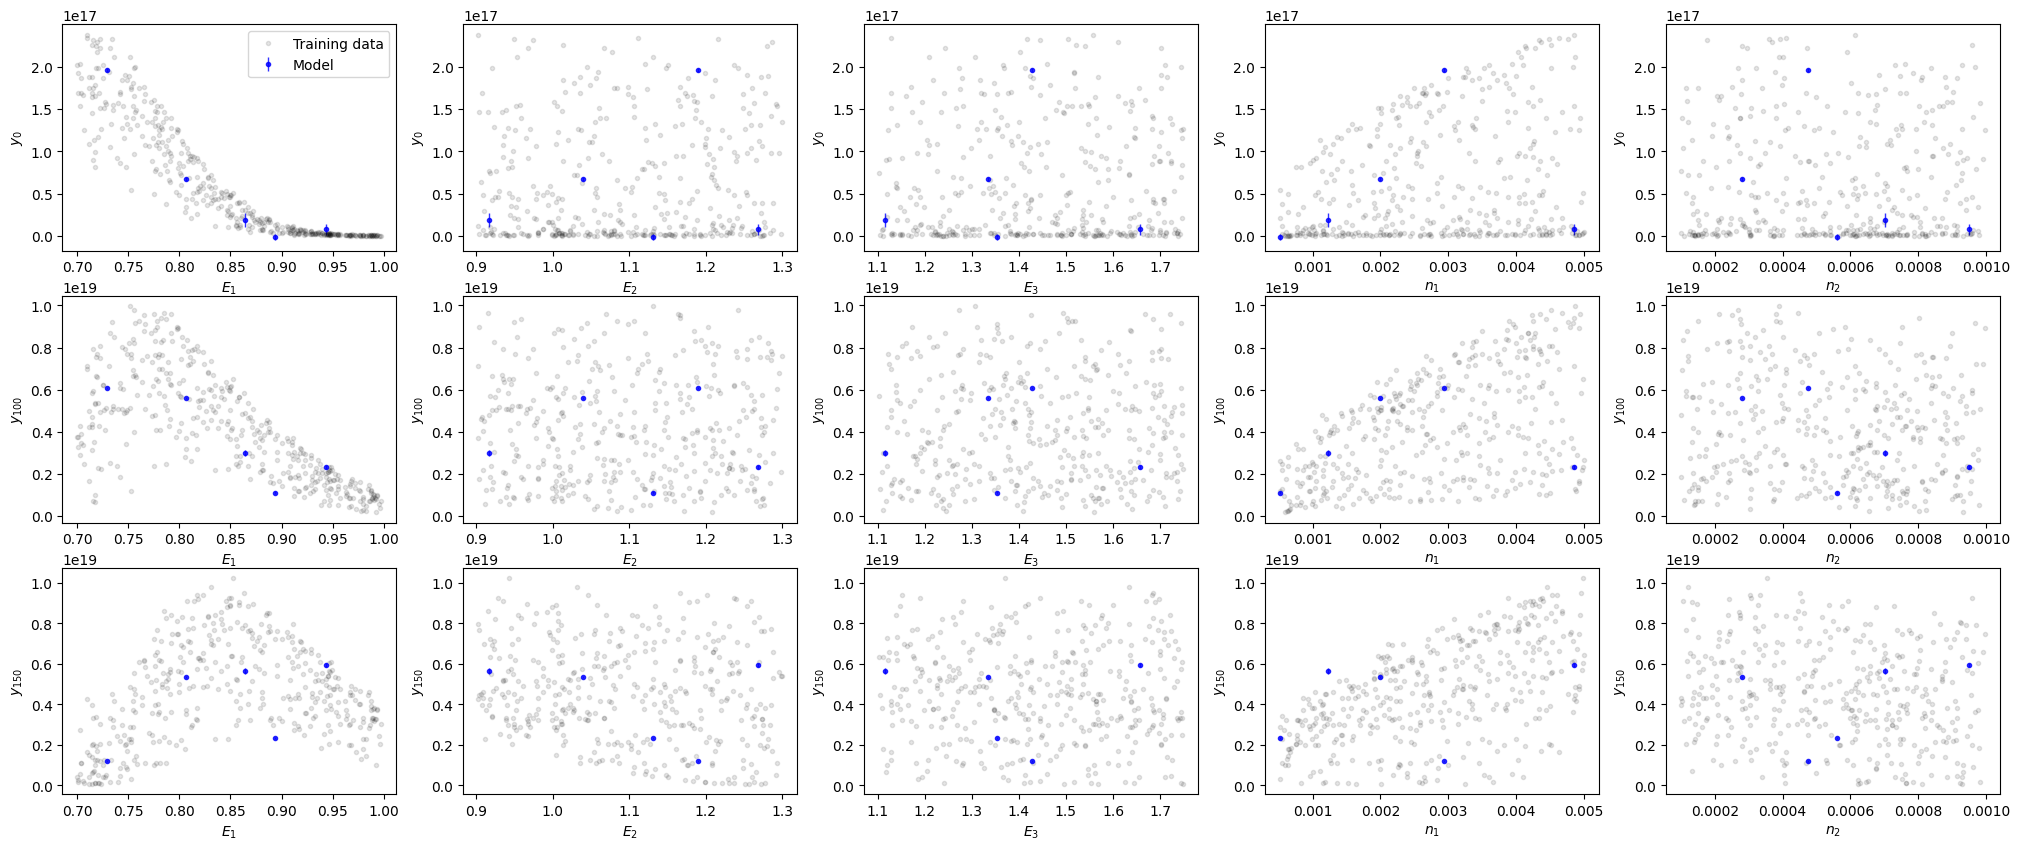

In [15]:
# Parameters for plot
color = "blue"
alpha = 0.8
xs = {"E1": r"$E_{1}$", "E2": r"$E_{2}$", "E3": r"$E_{3}$", "n1": r"$n_{1}$", "n2": r"$n_{2}$"}
ys = {f"y{i}": fr"$y_{{{i}}}$" for i in [0, 100, 150]}

# Plot some examples
nrow, ncol = len(ys), len(xs)
plt.subplots(nrow, ncol, figsize=(25, 10))
nplot = 0
for y, y_label in ys.items():
    for x, x_label in xs.items():
        nplot += 1
        plt.subplot(nrow, ncol, nplot)
        plt.errorbar(df_eval[x], df_mean[y], yerr=df_std[y], marker='.', lw=1, ls='None', color=color, alpha=alpha, label="Model")
        plt.plot(df_train[x], df_train[y], ".", color="black", alpha=0.1, label="Training data")
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        if nplot==1: plt.legend()
plt.show()

Plot the output of the trained function together with the "truth" from the evaluation file. The intensity of the blue regions here correspond to the probability. It can be seen that the truth mainly goes through the regions of high probability as predicted by the model.

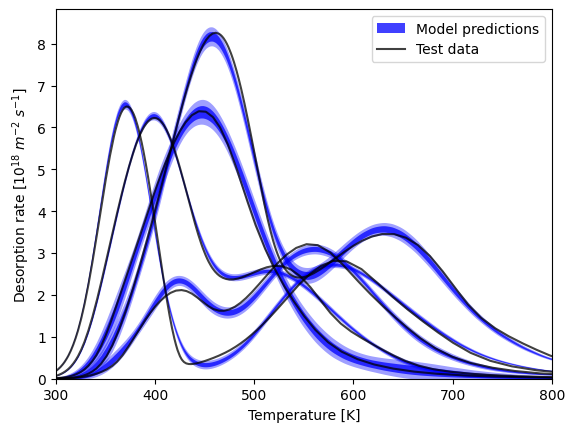

In [16]:
# Parameters for plot
error_inflation_factor = 1. # Factor to multiply error by for plotting
y_fac = 18 # Factor to divide y by for plotting [log10]
plot_eval = True
data_alpha = 0.75
plot_model_mean = False
plot_model_bands = True
plot_model_blur = False
nsigs = [1, 2]
model_alpha = 0.75
n_model_blur = 100
model_color = "blue"
number_of_training_examples = 0
number_of_model_examples = 5

# Plot results
grid = df_grid.iloc[:, 0]
plt.subplots()
if (plot_model_blur or plot_model_bands) and not plot_model_mean: 
    plt.fill_between(grid, np.nan, np.nan, color=model_color, alpha=model_alpha, lw=0., label="Model predictions")
for example in range(number_of_training_examples): # Training examples
    train = df_train[y_outputs].iloc[example]/10**y_fac
    label = "Example training data" if example==0 else None
    plt.plot(grid, train, color="black", alpha=0.5, label=label)
for example in range(number_of_model_examples): # Model predictions
    mean = df_mean[y_outputs].iloc[example]/10**y_fac
    err = error_inflation_factor*df_std[y_outputs].iloc[example]/10**y_fac
    if plot_eval and (filepath_eval == os.path.join(campaign_dir, "test.csv")):
        eval = df_eval[y_outputs].iloc[example]/10**y_fac
        label = "Test data" if example==0 else None
        plt.plot(grid, eval, color="black", alpha=data_alpha, label=label)
    if plot_model_mean:
        label = "Model predictions" if example==0 else None
        plt.plot(grid, mean, color=model_color, label=label, alpha=model_alpha)
    elif plot_model_bands:
        for nsig in nsigs:
            plt.fill_between(grid, mean-nsig*err, mean+nsig*err, color=model_color, alpha=model_alpha/nsig, lw=0.)
    elif plot_model_blur:
        alpha = tl.get_blur_alpha(n_model_blur, model_alpha)
        dys = tl.get_blur_boundaries(n_model_blur)
        for dy in dys:
            plt.fill_between(grid, mean-dy*err, mean+dy*err, color=model_color, alpha=alpha, lw=0.)
plt.xlabel(r'Temperature [K]')
plt.xlim((grid.min(), grid.max()))
plt.ylabel(rf"Desorption rate [$10^{{{y_fac}}}$ $m^{{{-2}}}$ $s^{{{-1}}}$]")
plt.ylim(bottom=0.)
plt.legend()
plt.show()

Finally, delete the campaign and dataset if necessary

In [17]:
tl.delete_campaign(campaign_id, verbose=True)
tl.delete_dataset(dataset_id, verbose=True)

Model ukaea deleted from the Cloud.
Dataset ukaea deleted from the Cloud.
